# Analytic Report 

In [1]:
import pandas as pd
import scipy as scipy
from scipy.stats import ttest_ind 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("Cardiology.xls",sheetname='Sheet1')

In [3]:
data.head()

,age,sex,chest pain type,blood pressure,cholesterol,Fasting blood sugar <120,resting ecg,maximum heart rate,angina,peak,slope,#colored vessels,thal,class
0,60,1,4,130,206,0,2,132,1,2.4,2,2,7,0
1,49,1,2,130,266,0,0,171,0,0.6,1,0,3,1
2,64,1,1,110,211,0,2,144,1,1.8,2,0,3,1
3,63,1,4,130,254,0,2,147,0,1.4,2,1,7,0
4,53,1,4,140,203,1,2,155,1,3.1,3,0,7,0


In [4]:
data = data[['age','sex','blood pressure','cholesterol','class']]
data.describe()

,age,sex,blood pressure,cholesterol,class
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.544554
std,9.082101,0.466011,17.538143,51.830751,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,1.000000
75%,61.000000,1.000000,140.000000,274.500000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


### 1.	How does blood pressure and cholesterol relate to each other.

In [10]:
corr = data['blood pressure'].corr(data['cholesterol'])
print('The correlation coefficient between blood presure and cholesterol is %.5f' %corr)

The correlation coefficient between blood presure and cholesterol is 0.12317


Thus, there is little relation between cholesterol and blood pressure.

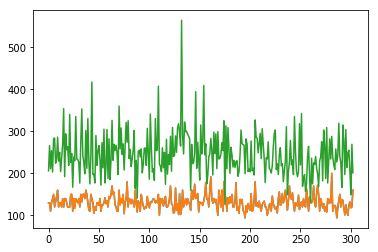

In [7]:
plt.plot(data['blood pressure'])
plt.plot(data['cholesterol'])
plt.show()

### 2a.	Do men tend to have higher blood pressure than women?

* Alternative hypothesis : Men has higher blood pressure than women
* Null hypothesis        : Men does not have higher blood pressure than women


In [10]:
men = data[data['sex']==0]
women = data[data['sex']==1]

p_value = ttest_ind(men['blood pressure'],women['blood pressure']).pvalue
print("The p-value between men's blood pressure and women's blood pressure is %.5f" %p_value)

The p-value between men's blood pressure and women's blood pressure is 0.32468


Since p-value = 0.32468 > 0.1, we do not have enough evidence to reject the null hypothesis and conclude that men tend to have higher blood pressure than women.

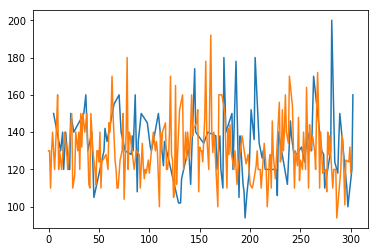

In [11]:
plt.plot(men["blood pressure"])
plt.plot(women["blood pressure"])
plt.show()

### 2b. Do men tend to have higher cholesterol than women?

* Alternative hypothesis : Men has higher cholesterol than women
* Null hypothesis        : Men does not have higher cholesterol than women

In [13]:
men = data[data['sex']==0]
women = data[data['sex']==1]

p_value = ttest_ind(men['cholesterol'],women['cholesterol']).pvalue
print("The p-value between men's cholesterol and women's cholesterol is %.5f" %p_value)

The p-value between men's cholesterol and women's cholesterol is 0.00053


Since p-value = 0.00053 < 0.01, we have strong evidence to reject the null hypothesis and conclude that men tend to have higher cholesterol than women.

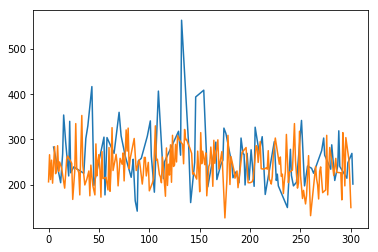

In [14]:
plt.plot(men["cholesterol"])
plt.plot(women["cholesterol"])
plt.show()

### 3a1. Does age causes heart disease for men ?

* Alternative hypothesis : Age causes heart disease for men
* Null hypothesis        : Age does not cause heart disease for men

In [15]:
men_heart_disease = data['age'][data['sex']==1][data['class']==0]
men_no_heart_disease = data['age'][data['sex']==1][data['class']==1]

p_value = ttest_ind(men_heart_disease,men_no_heart_disease).pvalue
print("The p-value between men's age that causes heart disease and men's age that does not cause heart disease is %.10f" %p_value)

The p-value between men's age that causes heart disease and men's age that does not cause heart disease is 0.0000210244


Since p-value = 0.0000210244 < 0.01, we have strong evidence to reject the null hypothesis and conclude that men's age causes heart disease.

### 3a2. Does age causes heart disease for women ?

* Alternative hypothesis : Age causes heart disease for women
* Null hypothesis        : Age does not cause heart disease for women

In [16]:
women_heart_disease = data['age'][data['sex']==0][data['class']==0]
women_no_heart_disease = data['age'][data['sex']==0][data['class']==1]

p_value = ttest_ind(women_heart_disease,women_no_heart_disease).pvalue
print("The p-value between women's age that causes heart disease and women's age that does not cause heart disease is %.10f" %p_value)

The p-value between women's age that causes heart disease and women's age that does not cause heart disease is 0.0424696311


Since p-value = 0.0424696311 < 0.05, we have enough evidence to reject the null hypothesis and conclude that women's age causes heart disease.

### 3b1. Does cholesterol causes heart disease for men ?

* Alternative hypothesis : Cholesterol causes heart disease for men
* Null hypothesis        : Cholesterol does not cause heart disease for men

In [17]:
men_heart_disease = data['cholesterol'][data['sex']==1][data['class']==0]
men_no_heart_disease = data['cholesterol'][data['sex']==1][data['class']==1]

p_value = ttest_ind(men_heart_disease,men_no_heart_disease).pvalue
print("The p-value between men's cholesterol that causes heart disease and men's cholesterol that does not cause heart disease is %.10f" %p_value)

The p-value between men's cholesterol that causes heart disease and men's cholesterol that does not cause heart disease is 0.0113480545


Since p-value = 0.0113480545 < 0.05, we have enough evidence to reject the null hypothesis and conclude that men's cholesterol causes heart disease.

### 3b2. Does cholesterol causes heart disease for women ?

* Alternative hypothesis : Cholesterol causes heart disease for women
* Null hypothesis        : Cholesterol does not cause heart disease for women

In [18]:
women_heart_disease = data['cholesterol'][data['sex']==0][data['class']==0]
women_no_heart_disease = data['cholesterol'][data['sex']==0][data['class']==1]

p_value = ttest_ind(women_heart_disease,women_no_heart_disease).pvalue
print("The p-value between women's cholesterol that causes heart disease and women's cholesterol that does not cause heart disease is %.10f" %p_value)

The p-value between women's cholesterol that causes heart disease and women's cholesterol that does not cause heart disease is 0.2372594614


Since p-value = 0.2372594614 > 0.1, we do not have enough evidence to reject the null hypothesis and conclude that women's cholesterol causes heart disease.

### 3c1. Does blood pressure causes heart disease for men ?

* Alternative hypothesis : Blood pressure causes heart disease for men
* Null hypothesis        : Blood pressure does not cause heart disease for men

In [19]:
men_heart_disease = data['blood pressure'][data['sex']==1][data['class']==0]
men_no_heart_disease = data['blood pressure'][data['sex']==1][data['class']==1]

p_value = ttest_ind(men_heart_disease,men_no_heart_disease).pvalue
print("The p-value between men's blood pressure that causes heart disease and men's blood pressure that does not cause heart disease is %.10f" %p_value)

The p-value between men's blood pressure that causes heart disease and men's blood pressure that does not cause heart disease is 0.3484860467


Since p-value = 0.3484860467 > 0.1, we do not have enough evidence to reject the null hypothesis and conclude that men's blood pressure causes heart disease.

### 3c2. Does blood pressure causes heart disease for women ?

* Alternative hypothesis : Blood pressure causes heart disease for women
* Null hypothesis        : Blood pressure does not cause heart disease for women

In [20]:
women_heart_disease = data['blood pressure'][data['sex']==0][data['class']==0]
women_no_heart_disease = data['blood pressure'][data['sex']==0][data['class']==1]

p_value = ttest_ind(women_heart_disease,women_no_heart_disease).pvalue
print("The p-value between women's blood pressure that causes heart disease and women's blood pressure that does not cause heart disease is %.10f" %p_value)

The p-value between women's blood pressure that causes heart disease and women's blood pressure that does not cause heart disease is 0.0000783738


Since p-value = 0.0000783738 < 0.01, we have strong evidence to reject the null hypothesis and conclude that women's blood pressure causes heart disease.

## Conclusion

1. Age causes heart disease for both men and women.
2. Cholesterol causes heart disease for men but not for women.
3. Blood pressure causes heart disease for women but not for men.
